<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 10 :
    <br><br>Decision Trees & Random Forest &<br><br>K-Means & PCA</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 19th Mordad, 23:00 </font></h1>



## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 10 :Decision Trees & Random Forest & K-Means & PCA</a>
</font>
</div>


# Step1: Import all Necessary Libraries

In [47]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step2: Import the Dataset

In [48]:
def answer_one(): 
    from sklearn.datasets import load_iris 
    cancer = load_iris()     
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

df = answer_one()

# Step3: Data Overview

In [49]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [50]:
df.shape

(150, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [52]:
df.corr()['target'].sort_values()

sepal width (cm)    -0.426658
sepal length (cm)    0.782561
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

# Step4: EDA 

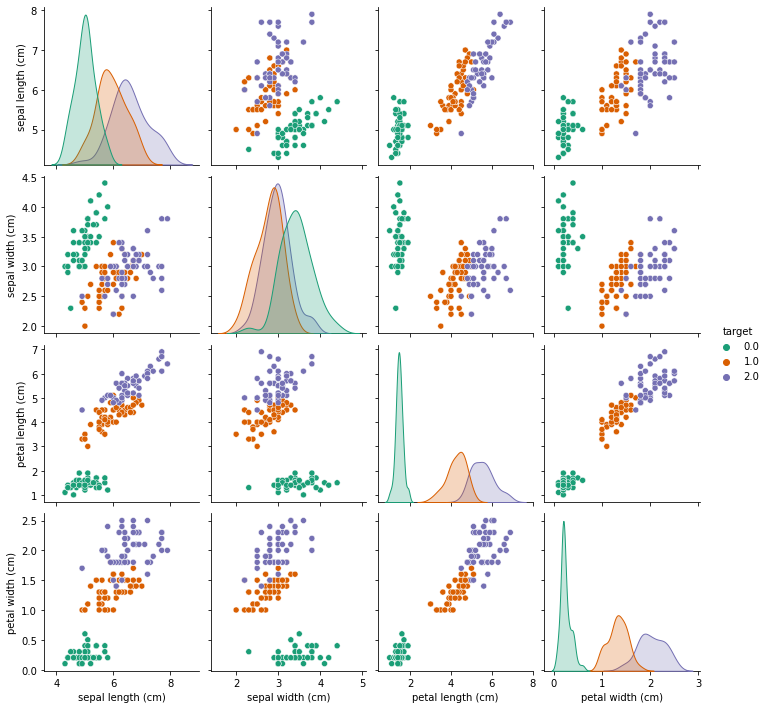

In [53]:
sns.pairplot(df, hue='target', palette='Dark2')

<AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>

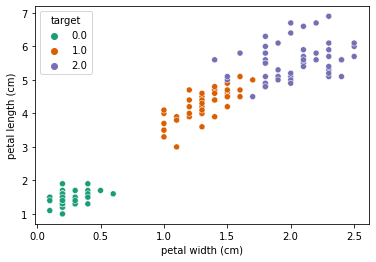

In [54]:
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='target', palette='Dark2')

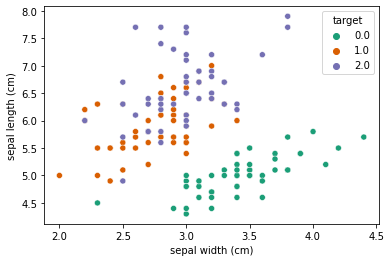

In [55]:
sns.scatterplot(data=df, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='Dark2');

# Step5: Determine the Features & Target Variable

In [56]:
Xs=df.drop('target',axis=1)
Ys=df['target']
Xs,Ys

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0.0
 1      0.0
 

# Step6: Split the Dataset to Train & Test set

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.20, random_state=101)

# PART 01: Decision Trees

# Step7: Train the Model

In [58]:
from sklearn.tree import DecisionTreeClassifier

modelDt=DecisionTreeClassifier()
modelDt.fit(X_train,y_train)

DecisionTreeClassifier()

# Step8: Predicting Test Data

In [59]:
yPredDt=modelDt.predict(X_test)
yPredDt

array([0., 0., 0., 1., 1., 2., 1., 1., 2., 0., 2., 0., 0., 2., 2., 1., 1.,
       1., 0., 2., 1., 0., 1., 1., 1., 1., 1., 2., 0., 0.])

# Step9: Evaluating the Model

## 🟣 Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,yPredDt))

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


### Classification Report

In [61]:
print(classification_report(y_test,yPredDt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Step10: Print Feature Importance

In [62]:
modelDt.feature_importances_

array([0.01668057, 0.        , 0.52863497, 0.45468446])

In [63]:
dfDtImportance=pd.DataFrame(index=Xs.columns, data=modelDt.feature_importances_, columns=['Feature Importance'])
dfDtImportance

,Feature Importance
sepal length (cm),0.016681
sepal width (cm),0.000000
petal length (cm),0.528635
petal width (cm),0.454684


# Step11: Visualize the Tree

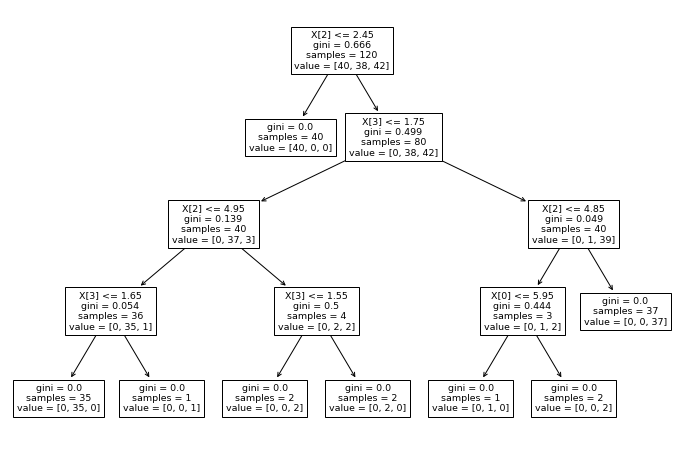

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(modelDt);

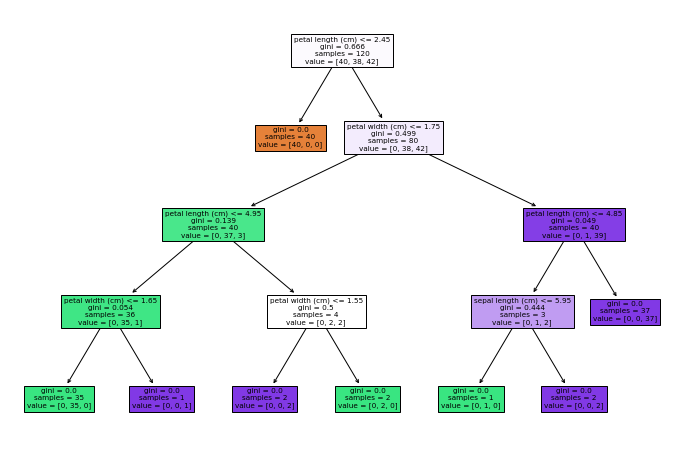

In [65]:
plt.figure(figsize=(12, 8))
plot_tree(modelDt, filled=True, feature_names=Xs.columns);

# Step12: Understanding Hyperparameters

## 🟣 Max Depth

### Classification Report

In [85]:
def DefPlotTree(model):
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=Xs.columns);

def DefClassificationReport(model):
    yPredDtDepth= model.predict(X_test)
    print(classification_report(y_test,yPredDtDepth))


In [86]:
modelPunnedTree=DecisionTreeClassifier(max_depth=2)
modelPunnedTree.fit(X_train,y_train)

DefClassificationReport(modelPunnedTree)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



### Plot Tree

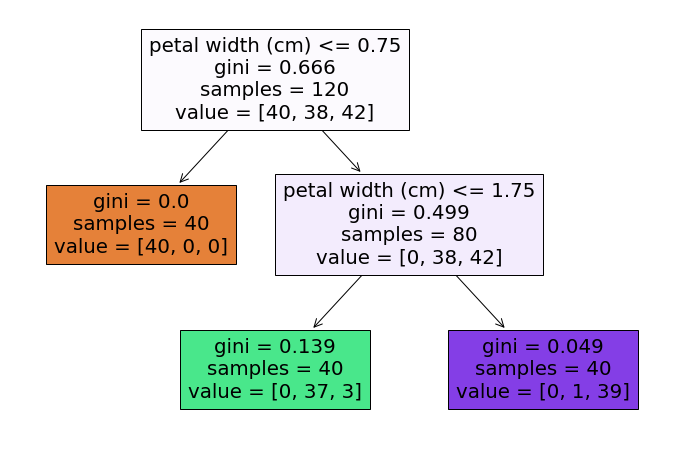

In [87]:
DefPlotTree(modelPunnedTree)

## 🟣 Max Leaf Nodes

### Classification Report

In [88]:
modelDtLeadNodes=DecisionTreeClassifier(max_leaf_nodes=4)
modelDtLeadNodes.fit(X_train,y_train)

DefClassificationReport(modelDtLeadNodes)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



### Plot Tree

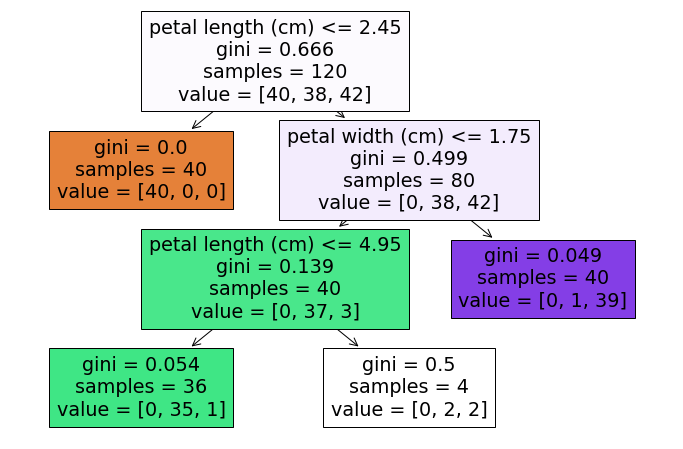

In [89]:
DefPlotTree(modelDtLeadNodes)

## 🟣 Criterion

### Classification Report

In [90]:
modelDtCriterion=DecisionTreeClassifier(criterion='entropy')
modelDtCriterion.fit(X_train,y_train)

DefClassificationReport(modelDtCriterion)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



### Plot Tree

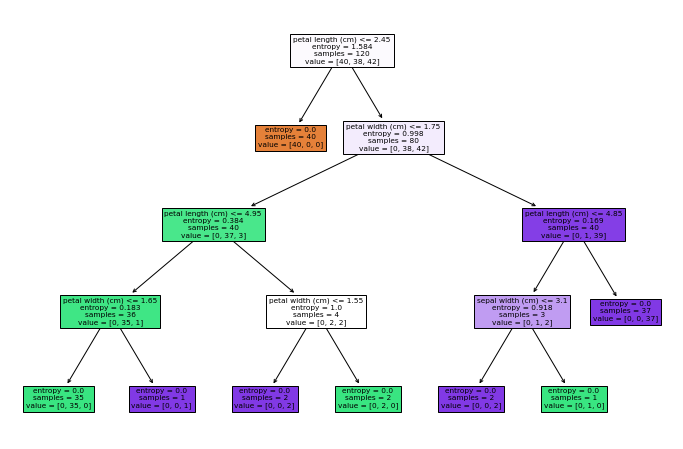

In [91]:
DefPlotTree(modelDtCriterion)

# PART 02: Random Forest

# Step13: Train the Model

In [118]:
from sklearn.ensemble import RandomForestClassifier

modelRf=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101,oob_score=True)
modelRf.fit(X_train,y_train)

f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=101)

# Step14: Predicting Test Data

In [119]:
yPredRf=modelRf.predict(X_test)
yPredRf

array([0., 0., 0., 2., 1., 2., 1., 1., 2., 0., 2., 0., 0., 2., 2., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 2., 0., 0.])

# Step15: Evaluating the Model

## 🟣 Confusion Matrix

In [120]:
print(confusion_matrix(y_test,yPredRf))

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


### Classification Report

In [121]:
DefClassificationReport(modelRf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Step16: Print Feature Importance

In [122]:
dfRfImportance=pd.DataFrame(index=Xs.columns, data=modelRf.feature_importances_, columns=['Feature Importance'])
dfRfImportance

,Feature Importance
sepal length (cm),0.084521
sepal width (cm),0.050196
petal length (cm),0.385720
petal width (cm),0.479563


# Step17: Grid Search

## Grid Search

In [123]:
from sklearn.model_selection import GridSearchCV

modelRfGrid=RandomForestClassifier(oob_score=True,random_state=101)
param_grid ={
'n_estimators':[5, 10, 20],
'criterion':['gini','entropy'],
'max_depth':[2,3,4],
'max_features':[2,4,'auto'],
}
modelRfGrid=GridSearchCV(modelRfGrid,param_grid=param_grid,cv=5);

modelRfGrid.fit(X_train,y_train);

f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
f:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute

## Predict

In [124]:
yPredRfGrid=modelRfGrid.predict(X_test)
yPredRfGrid

array([0., 0., 0., 1., 1., 2., 1., 1., 2., 0., 2., 0., 0., 2., 2., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 2., 0., 0.])

## Classification Report

In [125]:
DefClassificationReport(modelRfGrid)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



## OOB Error

In [128]:
oobError=1-modelRf.oob_score_
oobError

0.050000000000000044

## OOB.oob_score

In [129]:
modelRf.oob_score_

0.95

# PART 03: K-Means Clustering

# Step18: Creating and Fitting a KMeans Model

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler=StandardScaler()
scaler.fit(Xs)
XScaled=scaler.transform(Xs)

modelKmeans=KMeans(n_clusters=3)
clusterLabel=modelKmeans.fit_predict(XScaled)
clusterLabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [150]:
len(clusterLabel),len(XScaled)

(150, 150)

In [151]:
dfForKmeans=Xs
dfForKmeans['target']=clusterLabel
dfForKmeans

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [153]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [161]:
k=0
for i in df.index:
    if ((df['target'][i])==clusterLabel[i]):
        k=k+1

percent=k/len(clusterLabel)
print('Percentage kmeans accuracy by primary Dataframe=',percent)

Percentage kmeans accuracy by primary Dataframe= 0.5066666666666667


<AxesSubplot:>

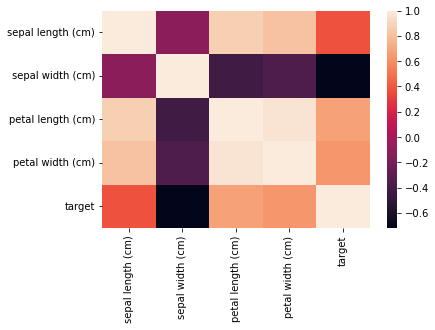

In [162]:
sns.heatmap(dfForKmeans.corr())

In [163]:
dfForKmeans.corr()['target'].sort_values()

sepal width (cm)    -0.720586
sepal length (cm)    0.381239
petal width (cm)     0.626900
petal length (cm)    0.672727
target               1.000000
Name: target, dtype: float64

<AxesSubplot:>

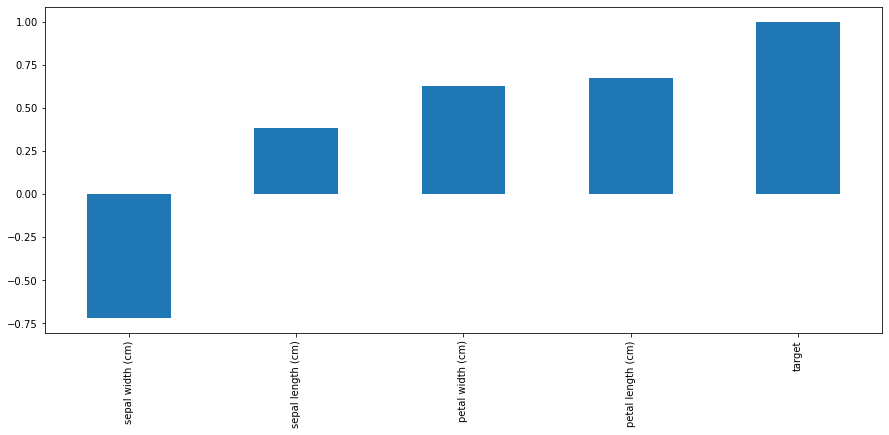

In [164]:
plt.figure(figsize=(15,6))
dfForKmeans.corr()['target'].sort_values().plot(kind='bar')

# Step19: Choosing K Value

In [176]:
ssd= []

for k in range (2, 20):
    model=KMeans(n_clusters=k)
    model.fit(XScaled)
    ssd.append(model.inertia_)

In [177]:
ssd

[372.2816195405701,
 139.82543466174192,
 114.80089223565422,
 96.64334861357791,
 82.05229183033322,
 73.1178693913919,
 65.18090547957124,
 56.167996175652,
 50.83210900851725,
 45.58184096152374,
 41.801954632071066,
 39.01038822146198,
 36.99293996348289,
 34.87967454310581,
 31.994494865499576,
 29.03010176379236,
 28.04073560570569,
 26.517713725758398]

## 🟣 Plot--> K Value, Sum of Squared Distances

Text(0, 0.5, 'Sum of Squared Distances')

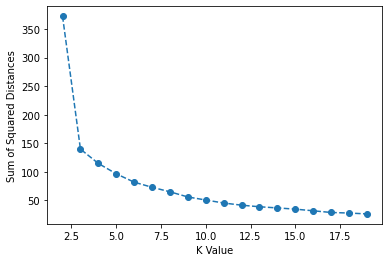

In [180]:
plt.plot(range(2,20), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')

## What's your choice?
<hr>

Answer:بنظر میاد با افزایش تعداد کلاستر مدل بهتر کار میکند..امااز ده به بعد تغییرات محسوسی مشاهده نشده

# PART 04: Principal Component Analysis(PCA)

# Step20: Build the model

In [182]:
from sklearn.decomposition import PCA

modelPca=PCA(n_components=2)
pcaComponent=modelPca.fit_transform(XScaled)

## Plot

Text(0, 0.5, 'Second Principal Component')

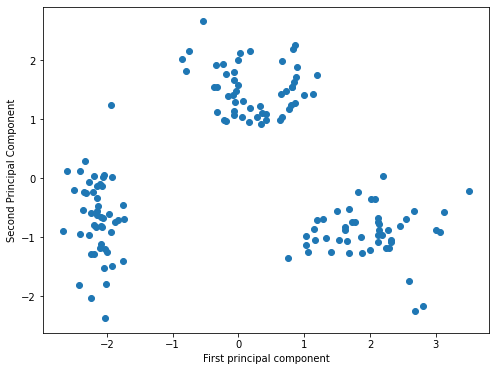

In [183]:
plt.figure(figsize=(8,6))
plt.scatter(pcaComponent[:,0],pcaComponent[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Step21: Model Components

In [185]:
modelPca.n_components_

2

In [187]:
modelPca.components_

array([[ 0.53251801, -0.20554789,  0.5642597 ,  0.55269556, -0.22430614],
       [-0.17583935, -0.69895235,  0.11088455,  0.07242634,  0.68044484]])

## We can visualize this relationship with a heatmap:

In [188]:
df_comp = pd.DataFrame(modelPca.components_,index=['PC1','PC2'],columns=df.columns)
df_comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
PC1,0.532518,-0.205548,0.564260,0.552696,-0.224306
PC2,-0.175839,-0.698952,0.110885,0.072426,0.680445


<AxesSubplot:>

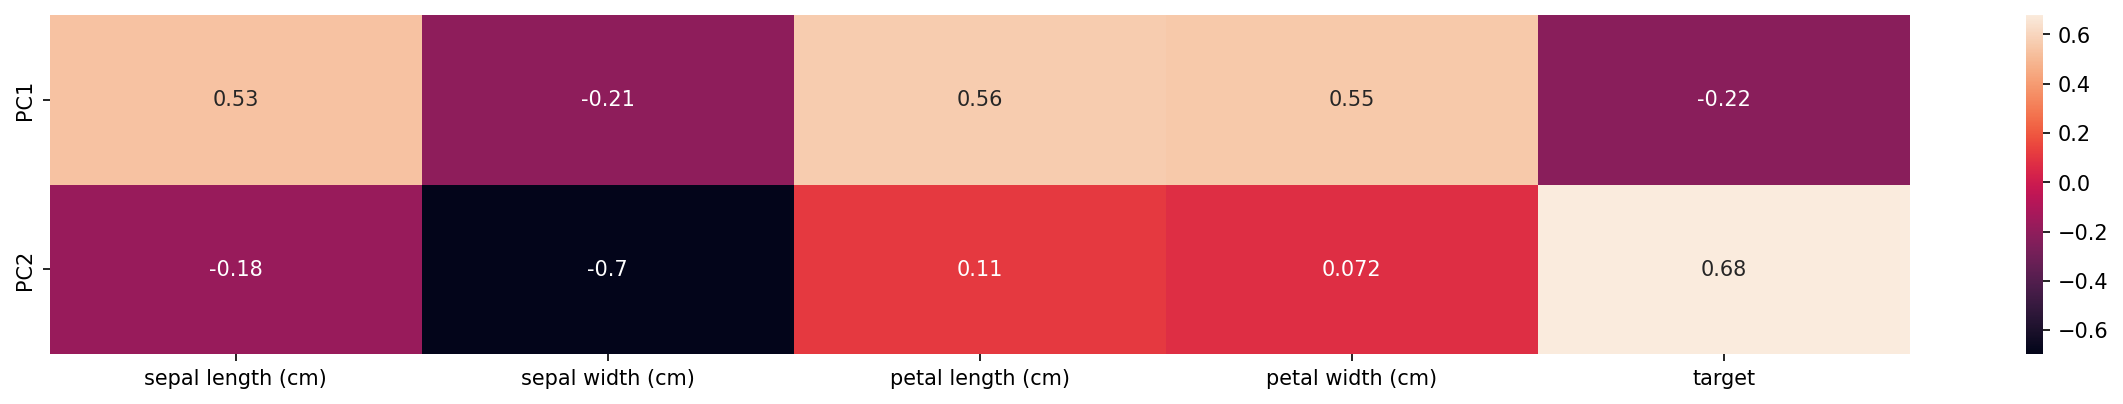

In [189]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_comp,annot=True)

# Step22: Calculating the Explained Variance by the Component

In [191]:
modelPca.explained_variance_ratio_

array([0.60344403, 0.29519444])

In [193]:
np.sum(modelPca.explained_variance_ratio_)

0.898638470161826

In [198]:
pca_30 = PCA(n_components=5)
pca_30.fit(XScaled)
np.sum(pca_30.explained_variance_ratio_)

1.0

# Choosing n-components

In [199]:
explained_variance = []

for n in range(1,5):
    pca = PCA(n_components=n)
    pca.fit(XScaled)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

explained_variance    

[0.6034440268429906, 0.898638470161826, 0.9673488897899313, 0.9960496967835915]

## 🟣 Plot--> Number of Components, Variance Explained

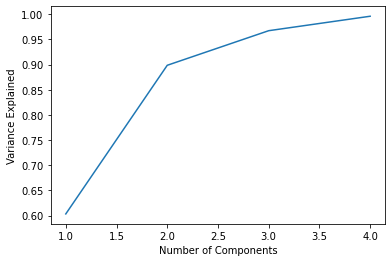

In [201]:
plt.plot(range(1,5),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");